In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [2]:
#função para tratar campo data
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

#Agora vamos importar nosso arquivo 
df = pd.read_excel('Variavel_out.xlsx', sheet_name='LookerStudio')
print(df.tail(10))

     Index     peso  comprimento_Total  comprimento_Padrao  \
937    NaN  1013.74               36.0                30.3   
938    NaN   795.64               34.5                28.3   
939    NaN   911.28               35.5                29.8   
940    NaN   898.40               36.0                30.2   
941    NaN   810.48               34.5                28.6   
942    NaN   822.67               36.0                30.6   
943    NaN   653.60               32.0                26.7   
944    NaN   905.54               35.2                28.8   
945    NaN   754.89               33.3                29.4   
946    NaN   756.22               33.3                28.2   

     comprimento_Cabeça  altura  espessura  
937                 9.8    11.6        3.5  
938                 9.2    10.8        3.2  
939                 8.2    10.8        3.1  
940                 9.5    10.7        3.0  
941                 9.5    10.2        3.1  
942                 9.0    10.6        3.2  
94

In [3]:
def drop_columns(df):
    """
    Drops the specified columns from the DataFrame and returns the resulting DataFrame.
    Also prints the first few rows of the resulting DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    
    Returns:
    pd.DataFrame: The DataFrame after dropping the specified columns.
    """
    columns_to_drop = ['espessura', 'Index']
    df = df.drop(columns=columns_to_drop)
    return df

In [5]:
# Assuming 'df' is your DataFrame and has already been loaded
# Define features and target
X = df[['comprimento_Total', 'altura']]  # Adjust features as needed
y = (df['peso'] > df['peso'].median()).astype(int)  # Split based on median or chosen value of 'peso'

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_scaled, y)

# Print accuracy and classification report
y_pred = svm.predict(X_scaled)
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

# Define the decision boundary for the split
w = svm.coef_[0]
b = svm.intercept_[0]
peso_threshold = -b / w[1]  # Define based on the decision boundary

print(f"Suggested threshold for 'peso': {peso_threshold}")

Accuracy: 0.9767687434002112

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       474
           1       0.98      0.97      0.98       473

    accuracy                           0.98       947
   macro avg       0.98      0.98      0.98       947
weighted avg       0.98      0.98      0.98       947

Suggested threshold for 'peso': -0.022786842802116455


C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but StandardScaler is expecting 2 features as input.

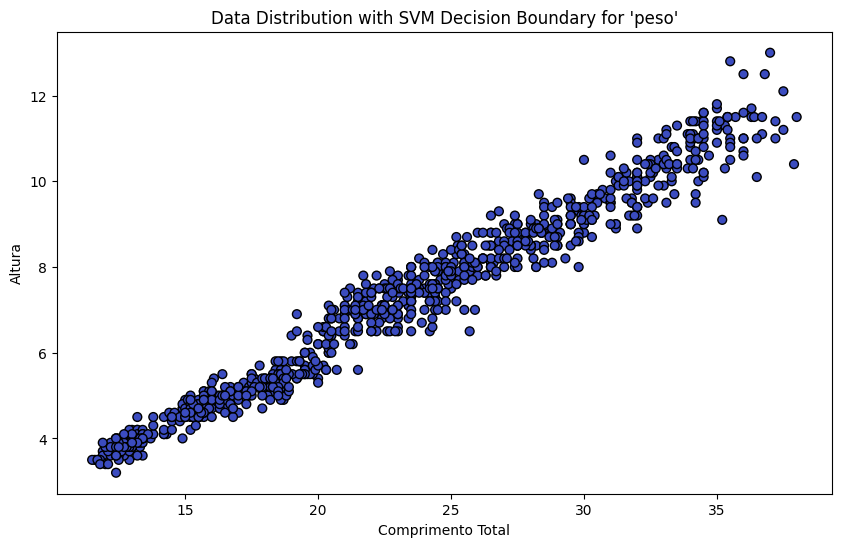

In [6]:
# Add cluster column based on the threshold
df['cluster'] = (df['peso'] > peso_threshold).astype(int)

# Visualize the clusters and SVM decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(df['comprimento_Total'], df['altura'], c=df['cluster'], cmap='coolwarm', edgecolor='k', s=40)
plt.title("Data Distribution with SVM Decision Boundary for 'peso'")
plt.xlabel('Comprimento Total')
plt.ylabel('Altura')

# Plot decision boundary
x_vals = np.linspace(X['comprimento_Total'].min(), X['comprimento_Total'].max(), 100)
y_vals = -(w[0] / w[1]) * scaler.transform(x_vals.reshape(-1, 1)) + (peso_threshold)
plt.plot(x_vals, y_vals, color='black', linestyle='--', label=f'Threshold at peso: {peso_threshold:.2f}')

plt.legend()
plt.show()